# Libraries

In [1]:
# Basic Libaries
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import pickle
from tqdm import tqdm_notebook as tqdm
import scipy.stats as stats
from scipy.stats import norm
import plotly.graph_objs as go
import plotly.offline as pyoff
from jupyterthemes import jtplot
jtplot.style(theme='onedork')
from pathlib import Path
import os

In [2]:
# LSTM Packages
from sklearn import preprocessing, metrics
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM, Dropout
from keras.layers import RepeatVector, TimeDistributed
from numpy import array
from keras.models import Sequential, load_model
from keras.preprocessing.sequence import TimeseriesGenerator
from scipy.special import boxcox, inv_boxcox

Using TensorFlow backend.


In [3]:
# Metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [15]:
# K means
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [14]:
from sklearn import preprocessing

# Upload Data

In [259]:
# Datapath AAPL
os.chdir('C:\\Users\\asus\\Documents\\Python Projects\\Trading - Research and Backtest\\AAPL')
datapath = os.getcwd() + '\\Databases\\'
files = []
for (dirpath, dirnames, filenames) in os.walk(datapath):
    files.extend(filenames)
    break
print(files)
df_aapl = pd.read_csv(datapath+'AAPL-1d.csv', parse_dates=True, index_col='Date')
print(df_aapl.head())

['AAPL-15min.csv', 'AAPL-1d.csv', 'AAPL-1min.csv', 'AAPL-1mo.csv', 'AAPL-1wk.csv', 'AAPL-2min.csv', 'AAPL-30min.csv', 'AAPL-3mo.csv', 'AAPL-5d.csv', 'AAPL-5min.csv', 'AAPL-60min.csv', 'AAPL-90min.csv']
            Open  High   Low  Close  Adj Close     Volume  Dividends  \
Date                                                                   
1980-12-12  0.51  0.52  0.51   0.51       0.40  117258400        0.0   
1980-12-15  0.49  0.49  0.49   0.49       0.38   43971200        0.0   
1980-12-16  0.45  0.45  0.45   0.45       0.36   26432000        0.0   
1980-12-17  0.46  0.46  0.46   0.46       0.36   21610400        0.0   
1980-12-18  0.48  0.48  0.48   0.48       0.38   18362400        0.0   

            Stock Splits  
Date                      
1980-12-12           0.0  
1980-12-15           0.0  
1980-12-16           0.0  
1980-12-17           0.0  
1980-12-18           0.0  


In [260]:
# Datapath SPY
os.chdir('C:\\Users\\asus\\Documents\\Python Projects\\Trading - Research and Backtest\\SPY')
datapath = os.getcwd() + '\\Databases\\'
files = []
for (dirpath, dirnames, filenames) in os.walk(datapath):
    files.extend(filenames)
    break
print(files)
df_spy = pd.read_csv(datapath+'SPY-1d.csv', parse_dates=True, index_col='Date')
print(df_spy.head())

['SPY-15min.csv', 'SPY-1d.csv', 'SPY-1min.csv', 'SPY-1mo.csv', 'SPY-1wk.csv', 'SPY-2min.csv', 'SPY-30min.csv', 'SPY-3mo.csv', 'SPY-5d.csv', 'SPY-5min.csv', 'SPY-60min.csv', 'SPY-90min.csv']
             Open   High    Low  Close  Adj Close   Volume  Dividends  \
Date                                                                    
1993-01-29  43.97  43.97  43.75  43.94      26.18  1003200        0.0   
1993-02-01  43.97  44.25  43.97  44.25      26.37   480500        0.0   
1993-02-02  44.22  44.38  44.12  44.34      26.43   201300        0.0   
1993-02-03  44.41  44.84  44.38  44.81      26.71   529400        0.0   
1993-02-04  44.97  45.09  44.47  45.00      26.82   531500        0.0   

            Stock Splits  
Date                      
1993-01-29             0  
1993-02-01             0  
1993-02-02             0  
1993-02-03             0  
1993-02-04             0  


In [286]:
# Merge Data
df = pd.merge(df_aapl.loc['2018-01-01':'2020-05-31'].drop(columns=['Close', 'Dividends', 'Stock Splits']),
                    df_spy.loc['2018-01-01':'2020-05-31'].drop(columns=['Close', 'Dividends', 'Stock Splits']),
                    left_index=True, right_index=True
                    )
df.rename(columns={'Open_x': 'Open_AAPL', 'High_x': 'High_AAPL', 'Low_x': 'Low_AAPL', 'Adj Close_x': 'Close_AAPL', 
                         'Volume_x': 'Volume_AAPL', 'Open_y': 'Open_SPY', 'High_y': 'High_SPY', 'Low_y': 'Low_SPY', 
                         'Adj Close_y': 'Close_SPY', 'Volume_y': 'Volume_SPY'}, inplace=True)
df.tail()

,Open_AAPL,High_AAPL,Low_AAPL,Close_AAPL,Volume_AAPL,Open_SPY,High_SPY,Low_SPY,Close_SPY,Volume_SPY
Date,,,,,,,,,,
2020-05-22,315.77,319.23,315.35,318.32,20450800,294.57,295.63,293.22,294.15,63958200
2020-05-26,323.50,324.24,316.50,316.16,31380500,301.93,302.19,295.46,297.77,88951400
2020-05-27,316.14,318.71,313.09,317.54,28236300,302.12,303.57,296.87,302.20,104817400
2020-05-28,316.77,323.44,315.63,317.68,33390200,304.65,306.84,302.24,301.64,90405200
2020-05-29,319.25,321.15,316.47,317.37,38399500,302.46,304.96,299.47,302.99,119265700


# Data Manipulation

In [322]:
# Include daily returns of stock
df['Returns_AAPL'] = np.log(df['Close_AAPL'] / df['Close_AAPL'].shift(1))
df['Returns_SPY'] = np.log(df['Close_SPY'] / df['Close_SPY'].shift(1))
df.dropna(inplace=True)
print(df.head())

            Open_AAPL  High_AAPL  Low_AAPL  Close_AAPL  Volume_AAPL  Open_SPY  \
Date                                                                            
2018-01-04     172.54     173.47    172.08      166.80     22434600    271.20   
2018-01-05     173.44     175.37    173.05      168.70     23660000    272.51   
2018-01-08     174.35     175.61    173.93      168.07     20567800    273.31   
2018-01-09     174.55     175.06    173.41      168.05     21584000    274.40   
2018-01-10     173.16     174.30    173.00      168.01     23959900    273.68   

            High_SPY  Low_SPY  Close_SPY  Volume_SPY  Returns_AAPL  \
Date                                                                 
2018-01-04    272.16   270.54     258.92    80636400      0.004627   
2018-01-05    273.56   271.95     260.65    83524000      0.011326   
2018-01-08    274.10   272.98     261.13    57319200     -0.003741   
2018-01-09    275.25   274.08     261.72    57254000     -0.000119   
2018-01-10  

In [323]:
# Target
target_stock = ['AAPL']
target_signal = ['Returns_AAPL']

In [ ]:
# Shift Data
df_target = df[target_signal].shift(1).dropna()
print('Target Data ',len(df_target), '\n', df_target.head())
_ = df.copy()
_.loc[:, df.columns != 'Open_AAPL'] = _.loc[:, df.columns != 'Open_AAPL'].shift(1)
df_features = _.drop(columns=target_signal).dropna()
print('Features Data ',len(df_features), '\n', df_features.head())
_ = None

In [360]:
df.shift(1)

,Open_AAPL,High_AAPL,Low_AAPL,Close_AAPL,Volume_AAPL,Open_SPY,High_SPY,Low_SPY,Close_SPY,Volume_SPY,Returns_AAPL,Returns_SPY
Date,,,,,,,,,,,,
2018-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-05,172.54,173.47,172.08,166.80,22434600.0,271.20,272.16,270.54,258.92,80636400.0,0.004627,0.004180
2018-01-08,173.44,175.37,173.05,168.70,23660000.0,272.51,273.56,271.95,260.65,83524000.0,0.011326,0.006659
2018-01-09,174.35,175.61,173.93,168.07,20567800.0,273.31,274.10,272.98,261.13,57319200.0,-0.003741,0.001840
2018-01-10,174.55,175.06,173.41,168.05,21584000.0,274.40,275.25,274.08,261.72,57254000.0,-0.000119,0.002257
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-22,318.66,320.89,315.87,316.28,25672200.0,296.79,297.67,293.69,293.59,78293900.0,-0.007497,-0.006924
2020-05-26,315.77,319.23,315.35,318.32,20450800.0,294.57,295.63,293.22,294.15,63958200.0,0.006429,0.001906
2020-05-27,323.50,324.24,316.50,316.16,31380500.0,301.93,302.19,295.46,297.77,88951400.0,-0.006809,0.012232


K means optimization for target signal

In [241]:
# Convert to Numpy Arrays
#-----Features-----
x_data = df_features.values
print('Features Data to array ', type(x_data), x_data.shape)
#-----Target-----
y_data = df_target[['Returns_AAPL_Kmeans']].values
print('Target Data to array ', type(y_data), y_data.shape)

Features Data to array  <class 'numpy.ndarray'> (604, 11)
Target Data to array  <class 'numpy.ndarray'> (604, 1)


In [325]:
# Number of observations in the dataset
num_data = len(df)
print('Number of observation in the dataset: ', num_data, 'data-points')

Number of observation in the dataset:  604 data-points


In [326]:
# Train-test split
train_split = 0.8
num_train = int(train_split*num_data)
print('Number of observations in the training set: ', num_train, 'data-points')
num_test = num_data-num_train
print('Number of observations in the testing set: ', num_test, 'data-points')
#-----Split data-----
#-------Features Data-------
num_x_signals = x_data.shape[1]
print('Total Features: ', num_x_signals, 'features')
x_train = x_data[:num_train]
x_test = x_data[num_train:]
if len(x_train)+len(x_test)==num_data: 
    print('Features Data Split Done')
    pass
#-------Target Data-------
num_y_signals = y_data.shape[1]
print('Total Target: ', num_y_signals, 'target')
y_train = y_data[:num_train]
y_test = y_data[num_train:]
if len(y_train)+len(y_test)==num_data:
    print('Target Data Split Done')
    pass

Number of observations in the training set:  483 data-points
Number of observations in the testing set:  121 data-points
Total Features:  11 features
Features Data Split Done
Total Target:  1 target
Target Data Split Done


In [ ]:
df

In [359]:
# Train-test split
train_split = 0.8
num_train = int(train_split*num_data)
print('Number of observations in the training set: ', num_train, 'data-points')
num_test = num_data-num_train
print('Number of observations in the testing set: ', num_test, 'data-points')
train = df[:num_train]
test = df[num_train:]

Number of observations in the training set:  483 data-points
Number of observations in the testing set:  121 data-points


In [328]:
# 'K' Optimiztion
sil = []
kmax = 10
kmin = 2
for k in range(kmin, kmax+1):
    kmean = KMeans(n_clusters = k).fit(train)
    labels = kmean.labels_
    sil.append(silhouette_score(train, labels, metric = 'euclidean'))
_ = pd.Series(sil[kmin:], index = range(kmin, kmax-(kmin-1)))
optimized_k = _[_ == _.max()].index[0]
print('Suggested K: ', optimized_k)

Suggested K:  2


In [ ]:
# K means cluster creation
_popularity = [] # To store
n_clusters = optimized_k # n_clusters
# popularity_clusters = ['Average', 'Popular', 'Extremely Popular']
for city in list_city:
    kmean = KMeans(n_clusters=n_clusters)
    kmean.fit(popularity[popularity['City'] == city].drop('City', axis = 1))
    _ = pd.Series(kmean.labels_, index = city_popularity[city]['Normalized Reviews'].index)
    _0 = pd.Series(list(kmean.cluster_centers_[:, 1])).sort_values().index
    for x in range(len(_0)):
        _.replace(_0[x], popularity_clusters[x], inplace = True)
    _popularity.append(_)
    city_popularity[city].update({'Popularity': _, 'kmean': kmean})
popularity['Popularity'] = pd.concat(_popularity)
coffee_shops['Popularity'] = popularity['Popularity']

In [329]:
# Kmeans cluster creation
kmean = KMeans(n_clusters=2)
kmean.fit(train)
_ = pd.Series(kmean.labels_, index = train.index)
_0 = pd.Series(list(kmean.cluster_centers_[:, 1])).sort_values().index

In [330]:
_z = _.copy()
for x in _0:
    _z.replace(_0[x], pd.Series(list(kmean.cluster_centers_[:, 1])).sort_values()[x], inplace = True)
train['Returns_AAPL_Kmeans'] = _
train

,Open_AAPL,High_AAPL,Low_AAPL,Close_AAPL,Volume_AAPL,Open_SPY,High_SPY,Low_SPY,Close_SPY,Volume_SPY,Returns_AAPL,Returns_SPY,Returns_AAPL_Kmeans
Date,,,,,,,,,,,,,
2018-01-04,172.54,173.47,172.08,166.80,22434600,271.20,272.16,270.54,258.92,80636400,0.004627,0.004180,0
2018-01-05,173.44,175.37,173.05,168.70,23660000,272.51,273.56,271.95,260.65,83524000,0.011326,0.006659,0
2018-01-08,174.35,175.61,173.93,168.07,20567800,273.31,274.10,272.98,261.13,57319200,-0.003741,0.001840,0
2018-01-09,174.55,175.06,173.41,168.05,21584000,274.40,275.25,274.08,261.72,57254000,-0.000119,0.002257,0
2018-01-10,173.16,174.30,173.00,168.01,23959900,273.68,274.42,272.92,261.32,69574300,-0.000238,-0.001530,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-27,265.58,267.98,265.31,266.00,16308900,314.61,315.48,314.37,310.73,44444600,0.013321,0.004451,0
2019-11-29,266.60,268.00,265.90,265.42,11654400,314.86,315.13,314.06,309.58,36592700,-0.002183,-0.003708,0
2019-12-02,267.27,268.25,263.45,262.35,23621800,314.59,314.66,311.17,306.95,75767800,-0.011634,-0.008532,0


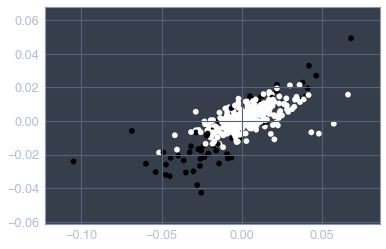

In [331]:
plt.scatter(train['Returns_AAPL'], train['Returns_SPY'], c=train['Returns_AAPL_Kmeans'], cmap='gist_heat_r')

In [332]:
_ = pd.Series(kmean.predict(test), index = test.index)
_0 = pd.Series(list(kmean.cluster_centers_[:, 1])).sort_values().index

In [333]:
_z = _.copy()
for x in _0:
    _z.replace(_0[x], pd.Series(list(kmean.cluster_centers_[:, 1])).sort_values()[x], inplace = True)
test['Returns_AAPL_Kmeans'] = _
test

,Open_AAPL,High_AAPL,Low_AAPL,Close_AAPL,Volume_AAPL,Open_SPY,High_SPY,Low_SPY,Close_SPY,Volume_SPY,Returns_AAPL,Returns_SPY,Returns_AAPL_Kmeans
Date,,,,,,,,,,,,,
2019-12-05,263.79,265.89,262.73,263.76,18606100,312.23,312.25,310.58,307.33,40709000,0.014550,0.001824,0
2019-12-06,267.48,271.00,267.30,268.86,26518900,314.12,315.31,314.11,310.13,48927000,0.019151,0.009069,0
2019-12-09,270.00,270.80,264.91,265.09,32010600,314.44,315.18,313.80,309.16,34838500,-0.014121,-0.003133,0
2019-12-10,268.60,270.07,265.86,266.64,22605100,313.82,314.55,312.81,308.81,52649800,0.005830,-0.001133,0
2019-12-11,268.81,271.10,268.50,268.91,19689200,314.03,314.70,313.44,309.69,53429100,0.008477,0.002846,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-22,315.77,319.23,315.35,318.32,20450800,294.57,295.63,293.22,294.15,63958200,0.006429,0.001906,0
2020-05-26,323.50,324.24,316.50,316.16,31380500,301.93,302.19,295.46,297.77,88951400,-0.006809,0.012232,0
2020-05-27,316.14,318.71,313.09,317.54,28236300,302.12,303.57,296.87,302.20,104817400,0.004355,0.014768,0


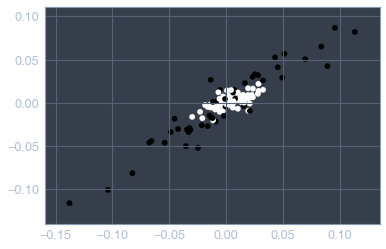

In [334]:
plt.scatter(test['Returns_AAPL'], test['Returns_SPY'], c=test['Returns_AAPL_Kmeans'], cmap='gist_heat_r')

In [335]:
train['Returns_AAPL'].describe()

count    483.000000
mean       0.000928
std        0.017627
min       -0.104915
25%       -0.007297
50%        0.001295
75%        0.010205
max        0.068004
Name: Returns_AAPL, dtype: float64

In [336]:
test['Returns_AAPL'].describe()

count    121.000000
mean       0.001649
std        0.033137
min       -0.137711
25%       -0.011483
50%        0.001977
75%        0.016155
max        0.113173
Name: Returns_AAPL, dtype: float64

In [ ]:
plt.v

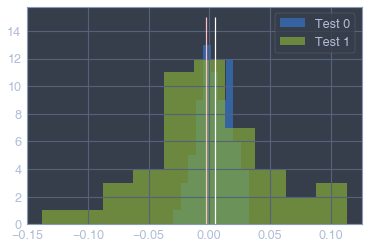

In [357]:
plt.hist(test[test['Returns_AAPL_Kmeans'] == 0]['Returns_AAPL'], alpha=0.7, label=['Test 0'])
plt.vlines(np.mean(test[test['Returns_AAPL_Kmeans'] == 0]['Returns_AAPL']), ymin=0, ymax=15, color='white')
plt.hist(test[test['Returns_AAPL_Kmeans'] == 1]['Returns_AAPL'], alpha=0.7, label=['Test 1'])
plt.vlines(np.mean(test[test['Returns_AAPL_Kmeans'] == 1]['Returns_AAPL']), ymin=0, ymax=15, color='pink')
plt.legend()
plt.show()

In [358]:
stats.normaltest(test[test['Returns_AAPL_Kmeans'] == 1]['Returns_AAPL'])

NormaltestResult(statistic=20.543733806528106, pvalue=3.459273381629979e-05)